##Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# given data
#np.random.seed(1)
#x = np.random.normal(loc=1, scale=1, size=(100,2)) - np.array([0.5, 0])
#x[50:] = np.random.normal(loc=2, scale=1, size=(50,2)) + np.array([1.5,0])
#y = np.ones(100) * -1
#y[50:] *= -1

# 1a
#X = np.array([[-1, -1], [1, 0], [-1, 1.5]])
#Y = np.array([[1], [-1], [1],])

X = np.array([[-4, 2],[-2, 1], [-1, -1], [2, 2], [1, -2]])
Y = np.array([[1], [1], [-1],[-1],[-1],])

In [3]:
def perceptron_single_step_update(x, y, current_theta, current_theta_0):
    print("-")
    #print(np.dot(current_theta, x) + current_theta_0)
    print("-")
    if y * (np.dot(current_theta, x) + current_theta_0) <= 0:
        current_theta += y*x
        current_theta_0 += y
        print('update')
    return (current_theta, current_theta_0)

In [4]:
def plotall(X, Y, theta, theta_0):
    # Plotting Toy data
    plt.figure()
    for index, x in enumerate(X):
        if Y[index] == -1:
            plt.scatter(x[0], x[1], c = 'm', marker = 'o')
        else:
            plt.scatter(x[0], x[1], c = 'r', marker = 'x')
    
    x1, x2 = perceptron_line(theta, theta_0)
    plt.plot(x1,x2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

In [5]:
def perceptron(feature_matrix, labels, T, L):

    # initializing theta and theta_0 for the different perceptron algorithms
    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = np.zeros(1)
    
    sum_theta = np.zeros(feature_matrix.shape[1])
    sum_theta_0 = np.zeros(1)
    
    update_counter = 0
    
    # updating perceptrons
    for t in range(T):
        for i in range(feature_matrix.shape[0]):
            update_counter += 1
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i],labels[i],theta,theta_0)
            sum_theta += theta
            sum_theta_0 += theta_0
            print(theta)
            print(theta_0)
         
        print(t)
        print(theta)
        print(theta_0)
        #x1, x2 = perceptron_line(theta, theta_0, algorithm='perceptron')
        plotall(feature_matrix, labels, theta, theta_0)
        
        # delaying
        #time.sleep(1.5)
        
    return (theta, theta_0)

In [6]:

def perceptron_line(theta, theta_0):
    """
    Draw the classification boundary line
    Arguments:
        theta - The theta being used.
        theta_0 - The theta_0 being used.
        algorithm - Indicating which line to draw. 

    Returns: The data points of the boundary line
    """
    # generate the data points of the boundary line
    if  theta[1] != 0:
        line_x1 = np.linspace(-5,10)
        line_x2 = (-theta_0-(theta[0]*line_x1))/theta[1]
    elif theta[0] != 0:
        line_x2 = np.linspace(-5,10)
        line_x1 = (-theta_0-(theta[1]*line_x2))/theta[0]
    else:
        line_x1 = np.array([0])
        line_x2 = np.array([0])

    return line_x1, line_x2

-
-
update
[-4.  2.]
[1.]
-
-
[-4.  2.]
[1.]
-
-
update
[-3.  3.]
[0.]
-
-
update
[-5.  1.]
[-1.]
-
-
[-5.  1.]
[-1.]
0
[-5.  1.]
[-1.]


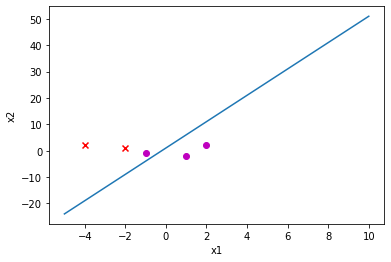

-
-
[-5.  1.]
[-1.]
-
-
[-5.  1.]
[-1.]
-
-
update
[-4.  2.]
[-2.]
-
-
[-4.  2.]
[-2.]
-
-
[-4.  2.]
[-2.]
1
[-4.  2.]
[-2.]


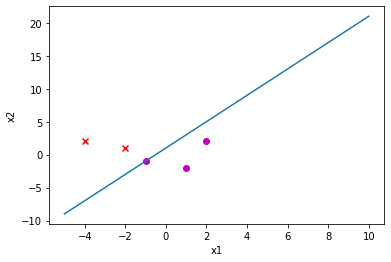

-
-
[-4.  2.]
[-2.]
-
-
[-4.  2.]
[-2.]
-
-
update
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
2
[-3.  3.]
[-3.]


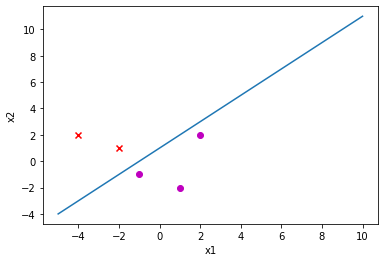

-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
3
[-3.  3.]
[-3.]


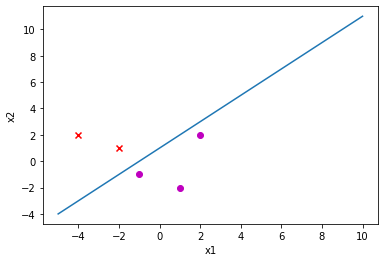

-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
4
[-3.  3.]
[-3.]


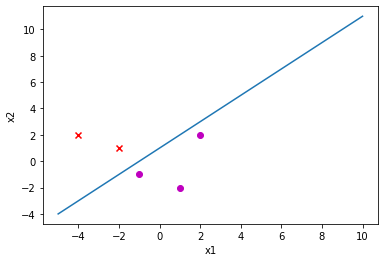

-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
5
[-3.  3.]
[-3.]


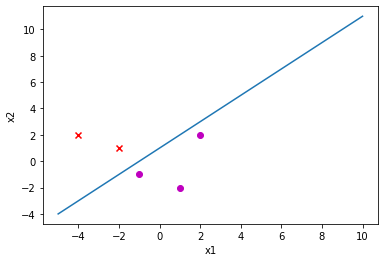

-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
6
[-3.  3.]
[-3.]


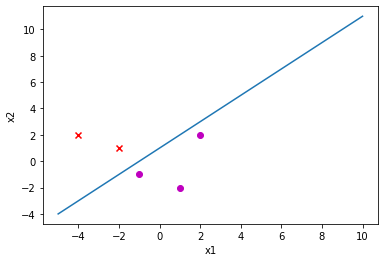

-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
-
-
[-3.  3.]
[-3.]
7
[-3.  3.]
[-3.]


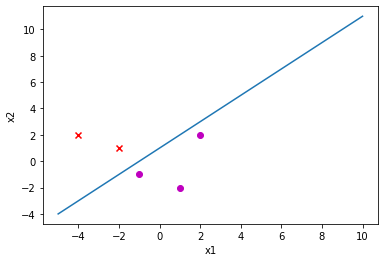

In [7]:
theta, theta_0 = perceptron(X, Y, 8, 0.2)

In [11]:
(theta,theta_0)

(array([-3.,  3.]), array([-3.]))